# Random Forest Classifier

Read Xy.pkl and create SQL table features_clf

In [18]:
import sys
sys.path.append('..')
from seizurecast.models.pipeline import Pipeline, Config

import numpy as np
import pandas as pd

pipeline = Pipeline(Config())
X, y = pipeline.load_xy('../data/processed/xy.pkl')

from seizurecast.features.to_sql import SQLengine

pd.DataFrame(X).assign(label=y).to_sql('features_clf', SQLengine)

TypeError: cannot unpack non-iterable NoneType object

Collected 3068 data points
Recall	 Base: 1.0	 Test: 0.57	 Train: 0.56
Precis	 Base: 0.49	 Test: 0.58	 Train: 0.56
Roc	 Base: 0.5	 Test: 0.61	 Train: 0.58
Recall	 Base: 1.0	 Test: 0.73	 Train: 0.71
Precis	 Base: 0.49	 Test: 0.61	 Train: 0.63
Roc	 Base: 0.5	 Test: 0.71	 Train: 0.71
Recall	 Base: 1.0	 Test: 0.87	 Train: 1.0
Precis	 Base: 0.49	 Test: 0.93	 Train: 1.0
Roc	 Base: 0.5	 Test: 0.95	 Train: 1.0


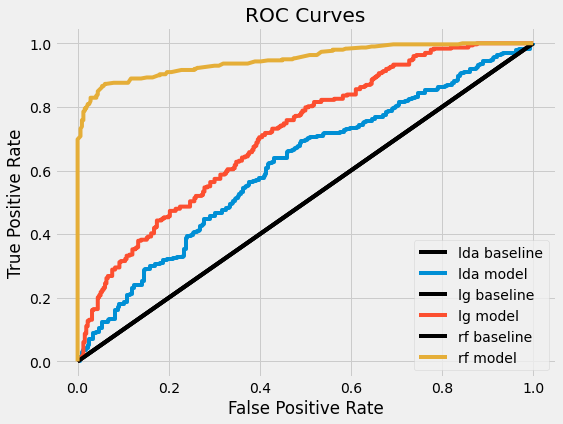

In [23]:
pipeline.load_default_models()
pipeline.pipe()
pipeline.results.plot_roc_curve()

In [ ]:
pipeline

In [1]:
import sys
sys.path.append('..')
from seizurecast.models.pipeline import Pipeline, Config
from seizurecast.features.to_sql import SQLengine
import pandas as pd

pipeline = Pipeline(Config())
df = pd.read_sql_table('features_clf', SQLengine)
df.head()

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,label
0,0,127.024759,69.546526,133.429728,75.579342,163.903390,86.561749,143.570808,53.153084,9.247431,8.734929,10.004829,10.836674,8.470147,12.550170,9.305133,10.220588,bckg
1,1,125.250078,67.183994,127.434964,77.281340,128.198433,66.344477,192.241251,68.802898,8.126782,8.490380,12.304529,11.684079,9.290573,9.912028,12.568496,12.651338,bckg
2,2,118.398407,103.558887,217.767268,110.263221,259.158859,94.618777,282.728322,91.828163,9.295707,10.862188,10.157833,10.618830,7.604622,7.939252,9.940667,9.570230,bckg
3,3,146.201855,73.323898,143.239389,94.063935,250.564918,82.789087,190.061045,83.145690,7.629506,8.055133,9.518876,9.070108,9.717384,10.508075,9.833249,9.648492,bckg
4,4,73.529885,51.142607,79.946733,60.309404,89.267631,45.180769,111.289420,62.992251,7.774465,8.232175,9.160430,8.521743,7.123599,9.732174,7.268022,9.429459,bckg


#### n_estimators

Collected 3068 data points
Recall	 Base: 1.0	 Test: 0.87	 Train: 1.0
Precis	 Base: 0.49	 Test: 0.93	 Train: 1.0
Roc	 Base: 0.5	 Test: 0.95	 Train: 1.0
Recall	 Base: 1.0	 Test: 0.85	 Train: 0.99
Precis	 Base: 0.49	 Test: 0.88	 Train: 1.0
Roc	 Base: 0.5	 Test: 0.93	 Train: 1.0
Recall	 Base: 1.0	 Test: 0.87	 Train: 0.98
Precis	 Base: 0.49	 Test: 0.8	 Train: 0.98
Roc	 Base: 0.5	 Test: 0.91	 Train: 1.0


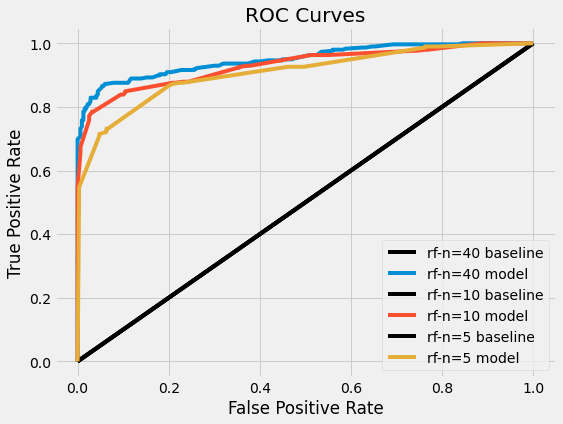

In [12]:
from sklearn.ensemble import RandomForestClassifier
from seizurecast.models.Result import Results

pipeline.X = df.iloc[:,1:17].to_numpy()
pipeline.y = df.iloc[:,17].to_numpy()
pipeline.results = Results()
pipeline.models = {}
pipeline.models['rf-n=40'] = RandomForestClassifier(n_estimators=40, max_depth=None,
                                               min_samples_split=3, random_state=0)
pipeline.models['rf-n=10'] = RandomForestClassifier(n_estimators=10, max_depth=None,
                                               min_samples_split=3, random_state=0)
pipeline.models['rf-n=5'] = RandomForestClassifier(n_estimators=5, max_depth=None,
                                               min_samples_split=3, random_state=0)
pipeline.pipe()
pipeline.results.plot_roc_curve()


#### min_sample_split

In [32]:
pipeline.results = Results()
pipeline.models = {}
pipeline.models['rf-min_split=3'] = RandomForestClassifier(n_estimators=40, max_depth=None,
                                               min_samples_split=3, random_state=0)
pipeline.models['rf-min_split=5'] = RandomForestClassifier(n_estimators=40, max_depth=None,
                                               min_samples_split=5, random_state=0)
pipeline.models['rf-min_split=10'] = RandomForestClassifier(n_estimators=40, max_depth=None,
                                               min_samples_split=10, random_state=0)
pipeline.pipe()
import numpy as np
pd.DataFrame({k: round(np.mean(v), 3) for (k, v) in pipeline.scores_CV.items()}, index=[0])

Collected 3068 data points
Recall	 Base: 1.0	 Test: 0.87	 Train: 1.0
Precis	 Base: 0.49	 Test: 0.93	 Train: 1.0
Roc	 Base: 0.5	 Test: 0.95	 Train: 1.0
Recall	 Base: 1.0	 Test: 0.85	 Train: 1.0
Precis	 Base: 0.49	 Test: 0.89	 Train: 1.0
Roc	 Base: 0.5	 Test: 0.94	 Train: 1.0
Recall	 Base: 1.0	 Test: 0.83	 Train: 0.99
Precis	 Base: 0.49	 Test: 0.9	 Train: 1.0
Roc	 Base: 0.5	 Test: 0.94	 Train: 1.0


,rf-min_split=3,rf-min_split=5,rf-min_split=10
0,0.867,0.864,0.863


In [31]:
import numpy as np
pd.DataFrame({k: round(np.mean(v), 3) for (k, v) in pipeline.scores_CV.items()}, index=[0])

,rf-min_split=3,rf-min_split=5,rf-min_split=10
0,0.867,0.864,0.863


In [34]:
pipeline.results = Results()
pipeline.models = {}
pipeline.models['rf-max_depth=None'] = RandomForestClassifier(n_estimators=40, max_depth=None,
                                               min_samples_split=3, random_state=0)
pipeline.models['rf-max_depth=20'] = RandomForestClassifier(n_estimators=40, max_depth=20,
                                               min_samples_split=3, random_state=0)
pipeline.models['rf-max_depth=10'] = RandomForestClassifier(n_estimators=40, max_depth=5,
                                               min_samples_split=3, random_state=0)
pipeline.pipe()
import numpy as np
pd.DataFrame({k: round(np.mean(v), 3) for (k, v) in pipeline.scores_CV.items()}, index=[0])

Collected 3068 data points
Recall	 Base: 1.0	 Test: 0.87	 Train: 1.0
Precis	 Base: 0.49	 Test: 0.93	 Train: 1.0
Roc	 Base: 0.5	 Test: 0.95	 Train: 1.0
Recall	 Base: 1.0	 Test: 0.85	 Train: 1.0
Precis	 Base: 0.49	 Test: 0.91	 Train: 1.0
Roc	 Base: 0.5	 Test: 0.95	 Train: 1.0
Recall	 Base: 1.0	 Test: 0.68	 Train: 0.71
Precis	 Base: 0.49	 Test: 0.84	 Train: 0.87
Roc	 Base: 0.5	 Test: 0.87	 Train: 0.91


,rf-max_depth=None,rf-max_depth=20,rf-max_depth=10
0,0.867,0.868,0.749


# Feature importance

In [41]:
def plot_feature_importance(forest):
    import matplotlib.pyplot as plt
    import numpy as np
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    num_of_features = len(indices)
    # Plot the impurity-based feature importances of the forest
    plt.figure(figsize=[5/15*num_of_features, 3])
    plt.title("Feature importances")
    plt.bar(range(len(importances)), importances[indices],
            color="r", yerr=std[indices], align="center")
    plt.xticks(range(len(importances)), indices)
    plt.xlim([-1, len(importances)])
    # plt.show()
    return(indices)

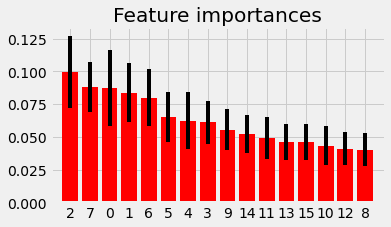

In [42]:
forest = pipeline.results.results['rf-max_depth=None'].model
indices = plot_feature_importance(forest)


Feature # 0 - 7 correspond to the amplitude of the Fourier transformed spectra for channel 0 - 7. The above figure showed these features are the most important ones in the random forest.   

# 8 channels vs 2 channels
Choose channel 2 and channel 6

Collected 3068 data points
Recall	 Base: 1.0	 Test: 0.87	 Train: 1.0
Precis	 Base: 0.49	 Test: 0.93	 Train: 1.0
Roc	 Base: 0.5	 Test: 0.95	 Train: 1.0
Collected 3068 data points
Recall	 Base: 1.0	 Test: 0.78	 Train: 0.99
Precis	 Base: 0.49	 Test: 0.73	 Train: 1.0
Roc	 Base: 0.5	 Test: 0.81	 Train: 1.0


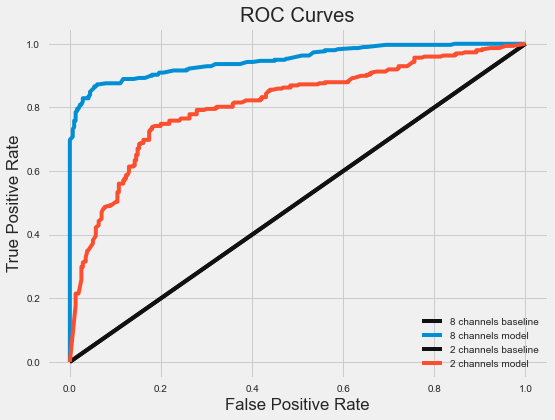

In [86]:
pipeline.results = Results()
pipeline.models = {}
pipeline.models['8 channels'] = RandomForestClassifier(n_estimators=40, max_depth=None,
                                               min_samples_split=3, random_state=0)
pipeline.pipe()
results = pipeline.results

# 2channel
pipe2 = Pipeline(Config())
pipe2.X = pipeline.X[:,[2,6]]
pipe2.y = pipeline.y
pipe2.models = {}
pipe2.models['2 channels'] = RandomForestClassifier(n_estimators=40, max_depth=None,
                                               min_samples_split=3, random_state=0)

pipe2.pipe()
results.append('2 channels', pipe2.results.results['2 channels'])
# import numpy as np
# pd.DataFrame({k: round(np.mean(v), 3) for (k, v) in pipeline.scores_CV.items()}, index=[0])

results.plot_roc_curve()

# Regression

In [1]:
import sys
sys.path.append('..')
from seizurecast.models.pipeline_sql import Pipeline_sql, Config

In [3]:
from seizurecast.features.to_sql import SQLengine
import pandas as pd
pd.read_sql("""select count(*) from features;""", SQLengine)

,count
0,1842749


In [19]:
df = pd.read_sql("select * from features limit 1000;", SQLengine)
df.head()

,index,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f185,f186,f187,f188,f189,f190,f191,post,pres,token
0,0,0.781391,0.581065,9.0,18.0,0.808368,-0.001628,0.796078,44.0,0.009259,...,1.456269,0.162791,0.209302,0.122718,0.307280,70.975599,6.386110,99999.0,99999,00008660_s005_t004
1,1,0.307272,0.068679,9.0,20.0,0.768111,0.000969,0.768627,49.0,0.006047,...,1.406157,0.465116,0.511628,0.098175,0.285362,54.520902,6.623483,99999.0,99999,00008660_s005_t004
2,2,0.356097,0.164329,10.0,36.0,0.798340,-0.000216,0.803922,43.0,0.007407,...,1.384610,0.279070,0.139535,0.049087,0.245335,90.384036,8.093003,99999.0,99999,00008660_s005_t004
3,3,1.156459,0.936636,10.0,21.0,0.785286,0.000163,0.741176,50.0,0.008074,...,1.326482,0.395349,0.767442,0.073631,0.227505,114.460633,6.593064,99999.0,99999,00008660_s005_t004
4,4,0.786996,0.585391,10.0,18.0,0.854371,0.000441,0.803922,82.0,0.008889,...,1.349021,0.302326,0.767442,0.049087,0.187986,156.809995,5.349447,99999.0,99999,00008660_s005_t004


In [10]:
m, n = 100, 1842749
pd.read_sql(f"""
create table RandomKeys (RandomKey int);
create table RandomKeysAttempt (RandomKey int);
-- generate m random keys between 1 and n;
for i in 1..{m} loop
  insert RandomKeysAttempt select rand()*{n} + 1
end loop;""", SQLengine)
"""
-- eliminate duplicates
insert RandomKeys select distinct RandomKey from RandomKeysAttempt;

-- as long as we don't have enough, keep generating new keys,
-- with luck (and m much less than n), this won't be necessary
while count(RandomKeys) < {m}
  NextAttempt = rand()*{n} + 1;
  if not exists (select * from RandomKeys where RandomKey = NextAttempt)
    insert RandomKeys select NextAttempt;

-- get our random rows
select *
from RandomKeys r
join table t ON r.RandomKey = t.UniqueKey;
"""

NameError: name 'pd' is not defined

In [17]:
from seizurecast.features.to_sql import SQLengine
from sklearn.ensemble import RandomForestClassifier
from seizurecast.models.Result import Results

# pipeline.results = Results()
# pipeline.models = {}
# pipeline.

def run():
    nrow = 1842749
    conf = Config()
    conf.len_pos = 300
    conf.len_pre = 600
    conf.sec_gap = 600
    psql = Pipeline_sql(conf = conf)
    psql.engine = SQLengine
    psql.load_xy_default(f"SELECT * FROM features OFFSET floor(random()*{nrow}) LIMIT {nrow/2};")
    psql._postpres2labels()
    # df = pd.read_sql("select * from features limit 1000;", SQLengine)
    psql.models['rf'] = RandomForestClassifier(n_estimators=40, max_depth=None,
                                               min_samples_split=3, random_state=0)
    psql.pipe()
    psql.results.plot_roc_curve()
    
run()


Collected 296253 data points


PipelineError: # of unique values of y must >= 2

(-1.0, 192.0)

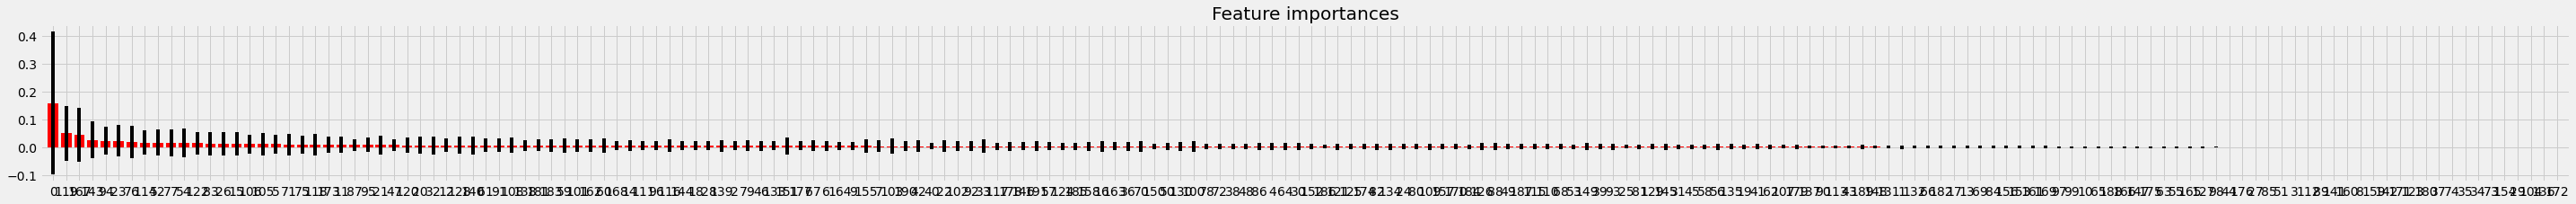

In [29]:


forest = psql.results.results['rf'].model


